### Disciplina de Análise de Séries Temporais Não Lineares - UNIFESP
___

# Série de exercícios VI

##### Autores: Aron Ifanger Maciel, Rodney Rick

### Exercício 1 

Implemente computacionalmente os Métodos de Reconstrução de Atrator	descritos	na	seção	6.1	do	livro do Gollub, que está disponível na nossa área comum (arquivo “Embeeding”). Se precisar, recorra às informações	que	estão disponíveis no capítulo 5	(arquiovo Gollub) para implementar os métodos.

In [3]:
import numpy as np

def psr(serie, m=2, tau=2):
    """
    Phase Space Reconstruction from Taken's Theorem
    :param serie: original time serie
    :param m: embedding dimention;
    :param tau: lag;
    :return: lagged time serie.
    """
    tail_size = -(m-1)*tau
    if tail_size == 0:
        return np.array([np.roll(serie, -i*tau) for i in range(m)])
    else:
        return np.array([np.roll(serie, -i*tau)[:-(m-1)*tau] for i in range(m)])

### Exercício 2

Aplique o método para fazer o Embeeding dos atratores de Lorenz e de Rossler.

In [4]:
def runge_kutta(ode, state, dt=0.01):
    """
    The Classic Runge Kutta Method
    https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods]
    
    :param ode: ODE object;
    :param state: input function;
    :param dt: interval (h);
    :return: integration result.
    """
    k1 = dt * ode.f(state)
    k2 = dt * ode.f(state + 0.5 * k1)
    k3 = dt * ode.f(state + 0.5 * k2)
    k4 = dt * ode.f(state + k3)
    
    return state + (k1 + 2 * k2 + 2 * k3 + k4) / 6


def generate(ode, lenght=int(2e4)):
    """
    Time series generation from a ODE
    
    :param ode: ODE object;
    :param lenght: serie lenght;
    :return: time serie.
    """
    state = ode.initial_state
    data = np.zeros([int(state.shape[0]), lenght])

    for i in range(5000):
        state = runge_kutta(ode, state)

    for i in range(lenght):
        state = runge_kutta(ode, state)
        data[:, i] = state

    return data

def generate_discrete(rmap, lenght=int(2e4)):
    """
    Time series generation from a ODE
    
    :param dmap: Map object;
    :param lenght: serie lenght;
    :return: time serie.
    """
    state = rmap.initial_state
    data = np.zeros([int(state.shape[0]), lenght])

    for i in range(5000):
        state = rmap.f(state)

    for i in range(lenght):
        state = rmap.f(state)
        data[:, i] = state

    return data


class LorenzODE:
    
    def __init__(self, state=None, parameters=None):
        """
        ODE constructor
        
        :param state: initial state (x, y, z);
        :param parameters: ODE parameters (sigma, beta, rho);
        """
        
        self.initial_state = state if state is not None else np.array([-8.0, 8.0, 27.0])
        self.parameters = parameters if parameters is not None else np.array([10.0, 8/3.0, 28.0])

        
    def f(self, state):
        """
        Lorenz ODEs
        https://en.wikipedia.org/wiki/Lorenz_system

        :return: f(x, y, z).
        """
        x, y, z = state
        sigma, beta, rho = self.parameters
        return np.array([sigma * (y - x), 
                         x * (rho - z) - y, 
                         x * y - beta * z])
    
    
class RosslerODE:
    
    def __init__(self, state=None, parameters=None):
        """
        :param state: initial state (x, y, z);
        :param parameters: ODE parameters (a, b, c);
        """
        
        self.initial_state = state if state is not None else np.array([-8.0, 8.0, 27.0])
        self.parameters = parameters if parameters is not None else np.array([0.2, 0.2, 5.7])

        
    def f(self, state):
        """
        Rossler ODEs
        https://en.wikipedia.org/wiki/R%C3%B6ssler_attractor

        :return: f(x, y, z).
        """
        x, y, z = state
        a, b, c = self.parameters
        return np.array([- y - z, 
                         a * y + x, 
                         z * (x - c) + b])
    
    
class HenonMap:
    
    def __init__(self, state=None, parameters=None):
        """
        :param state: initial state (x, y);
        :param parameters: ODE parameters (a, b);
        """
        
        self.initial_state = state if state is not None else np.array([0.6, 0.3])
        self.parameters = parameters if parameters is not None else np.array([1.4, 0.3])

        
    def f(self, state):
        """
        Henon Map
        https://en.wikipedia.org/wiki/H%C3%A9non_map

        :return: f(x, y).
        """
        x, y = state
        a, b = self.parameters
        return np.array([1 - a * x ** 2 + y, 
                         b * x])
    
    
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d 

def plot3d(xyz, title=None, angle=30):
    fig = plt.figure()
    ax = axes3d.Axes3D(fig)
    ax.plot3D(xyz[0], xyz[1], xyz[2], alpha=0.7)
    ax.view_init(30, angle)

    fig.add_axes(ax)
    plt.title(title)
    plt.show(block=False)
    
def plot2d(xy,title=None):
    plt.scatter(xy[0], xy[1], alpha=0.7, linewidths=0.01)
    plt.title(title)
    plt.show(block=False)

#### Atrator de Lorenz original e reconstruído

C:\Users\aroni\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


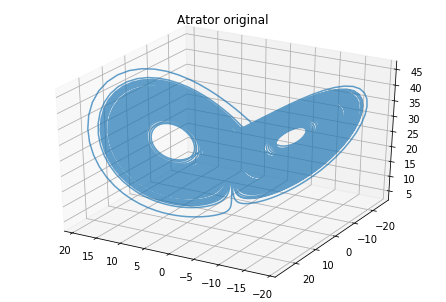

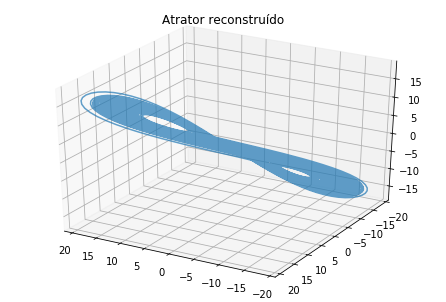

In [93]:
original_series = generate(LorenzODE())
plot3d(original_series, title="Atrator original", angle=120)

reconstructed_series = psr(original_series[0], m=3, tau=3)
plot3d(reconstructed_series, title="Atrator reconstruído", angle=120)

#### Atrator de Rossler original e reconstruído

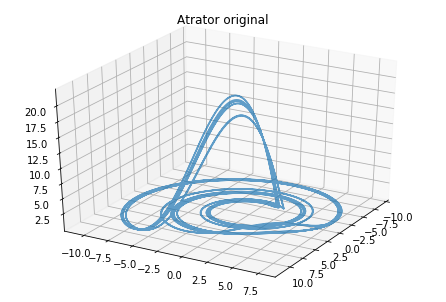

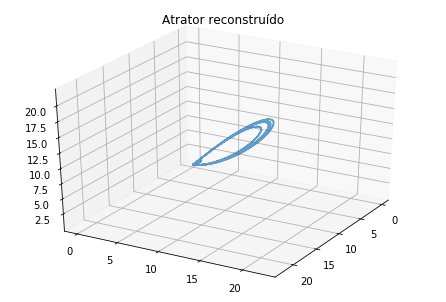

In [94]:
original_series = generate(RosslerODE())
plot3d(original_series, title="Atrator original")

reconstructed_series = psr(original_series[2], m=3, tau=3)
plot3d(reconstructed_series, title="Atrator reconstruído")

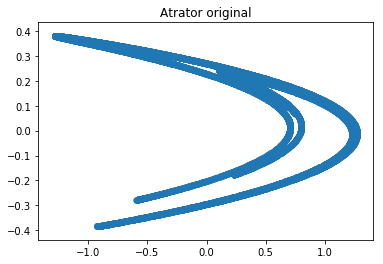

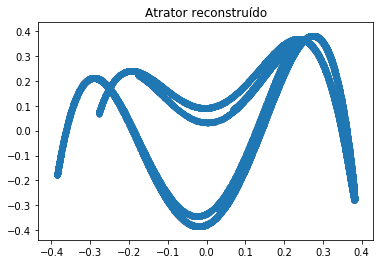

In [148]:
original_series = generate_discrete(HenonMap())
plot2d(original_series, title="Atrator original")

reconstructed_series = psr(original_series[1], m=2, tau=2)
plot2d(reconstructed_series, title="Atrator reconstruído")

### Exercício 3

Implemente os métodos de cálculo de expoente de Lyapunov apresentados no artigo do Parlitz, no arquivo denominado “Parlitz-LyapunovExponent”.

In [12]:
series = generate(LorenzODE()).transpose()

In [175]:
import numpy as np

def nn(i, series, w=5):
    """
    Find the nearest neighbor from a time series element
    :param i: a element position from time series
    :param series: the complete time series
    :param w: Theiler window 'w' from Paralitz paper
    :return: the nearest neighbor position on series
    """
    distances = np.max(series - series[i], axis=1)
    
    max_dist = max(distances)
    for k in np.arange(max(0, i-w), w):
        distances[k] = max_dist
    
    return np.argmin(distances)

In [176]:
import math

def logdist_pos(series, i, j, eta=1):
    """
    Log max distance from two elements from a time series
    :param series: the complete time series
    :param i: first element position from time series
    :param j: second element position from time series
    """
    if max(i, j) < len(series):
        dist =  math.log(max(abs(series[i] - series[j])) + 1e-8, 2)
        if dist < eta:
            return dist

O maior expoente de Lyapunov deveria ser o coeficiente angular deste gráfico de da evolução das distâncias.

In [197]:
def distance_evolution(series, k=15):

    N=len(series)
    dlist=np.zeros((N,k))
       
    iis = np.arange(N)
    nns = np.array([nn(i, series) for i in iis])
    
    for j in range(k):
        dlist[:,j] = np.array([logdist_pos(series, i+j, nns[i]+j) for i in iis])
    
    return np.nanmean(dlist, axis=0)

Este gráfico deveria ficar semelhante à figura 1.2 do artigo do Paralitz

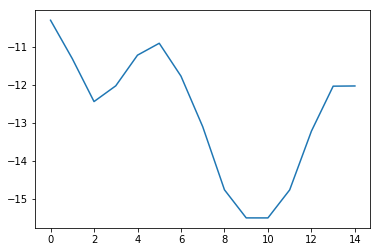

In [201]:
series = generate(LorenzODE()).transpose()
dist_evo = distance_evolution(series, 15)
plt.plot(dist_evo)

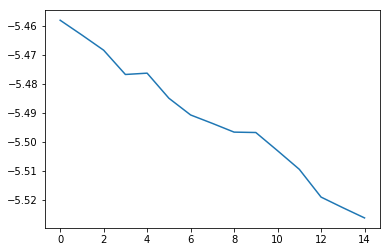

In [200]:
series = generate(RosslerODE()).transpose()
dist_evo = distance_evolution(series, 15)
plt.plot(dist_evo)

-1.5205028027093743


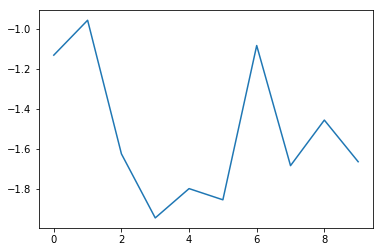

In [198]:
series = generate_discrete(HenonMap()).transpose()
dist_evo = distance_evolution(series, 10)
print(np.mean(dist_evo))
plt.plot(dist_evo)

Repetindo a tentativa, mas usando o cálculo da evolução de distâncias da internet.

In [211]:
# https://stackoverflow.com/questions/37908104/lyapunov-exponent-python-implementation

def distance_evolution2(series, eps=0.01):
    N = len(series)
    lyapunovs = [[] for i in range(N)]

    for i in range(N):
        for j in range(i + 1, N):
            if np.abs(np.max(series[i] - series[j])) < eps:
                for k in range(min(N - i, N - j, 15)):
                    lyapunovs[k].append(logdist_pos(series, i+k, j+k))
    
    return lyapunovs#np.array([np.mean(l) for l in lyapunovs])

In [ ]:
series = generate(LorenzODE()).transpose()
dist_evo = distance_evolution(series)
#plt.plot(dist_evo)

In [ ]:
series = generate(RosslerODE()).transpose()
dist_evo = distance_evolution(series)
plt.plot(dist_evo)

In [ ]:
series = generate_discrete(HenonMap()).transpose()
dist_evo = distance_evolution(series)
print(np.mean(dist_evo))
plt.plot(dist_evo)

In [139]:
import math

def logdist(a,b):
    """
    Log distance for two scalars
    """
    return math.log(abs(a - b) + 1e-8, 2)

def lyapunov(series, m=2, tau=2, k=10):
    """
    Lyapunov exponents from series
    """
    ls = psr(series, m, tau)    
    growth = [logdist(ls[0, j + k], ls[1, j + k]) - logdist(ls[0, j], ls[1, j]) for j in range(0, ls.shape[1] - k, k)]

    return  np.mean(growth)

### Exercício 4

Aplique-os para os atratores de Henon, Lorenz e Rossler.

In [133]:
series = generate_discrete(HenonMap(), 1000)
plot2d(original_series, title="Atrator original")

C:\Users\aroni\Anaconda3\lib\site-packages\ipykernel_launcher.py:111: RuntimeWarning: overflow encountered in double_scalars
C:\Users\aroni\Anaconda3\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\aroni\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in double_scalars


NameError: name 'original_series' is not defined

### Exercício 5

Reproduza, na medida do possível, os resultados apresentados no referido artigo.

In [143]:
series = generate(LorenzODE())
lyapunov(series[2])

0.0002356400405626455

In [27]:
import math
import mpl_toolkits.mplot3d.axes3d as axes3d 

def plot3d(xyz,title=None):
    figure = plt.figure()
    axes = axes3d.Axes3D(figure)
    axes.plot3D( xyz[0], xyz[1],xyz[2])

    figure.add_axes(axes)
    plt.title(title)
    plt.show(block=False)

def plot2d(xy,title=None):
    plt.plot(xy[0], xy[1])
    plt.title(title)
    plt.show(block=False)

def remove_tail(serie,tail_size):
    if tail_size>0:
        return serie[:-tail_size]
    else:
        return serie[:]

def create_lagged_series(serie,qtd,lag_size=2):
    """
    Baseado no Takens Embedding Theorem
    :param serie: uma serie temporal
    :param lag_size: tamanho do atraso, também conhecido como tau
    :param qtd: número de séries 
    :returns: uma lista de séries atrasadas 
    """
    series=[]
    tail_size=(qtd-1)*lag_size

    for i in range(qtd):
        series.append(remove_tail(numpy.roll(serie, -i*lag_size),tail_size))

    # import ipdb;ipdb.set_trace()
    return series


def heaviside_step(v):
    ret=0
    if v>0 :
        ret=1

    return ret

def norm(a,b):
    s=0
    for i in range(len(a)):
        s+=(a[i]-b[i])**2

    return math.sqrt(s)




def correlation(series, r,n):
    s=len(series)
    somatorio=0
    for i in range(n):
        for j in range(n):
            ti=[]
            tj=[]
            for k in range(s):
                ti.append(series[k][i])
                tj.append(series[k][j])
            # print("ti",ti)
            # print("tj",tj)

            somatorio+=heaviside_step(r-norm(ti,tj))

    c=(2/float((n*(n-1))))+somatorio
    return c;



def is_like(a,b,limiar=0.5):
    k=abs(a-b)
    print("k",k)
    print("limiar",limiar)

    return k<=abs(limiar)

def find_saturation(m_list,v_list):
    v_list_len=len(v_list)
    m_list_len=len(m_list)

    if v_list_len!=m_list_len:
        raise ValueError("listas de tamanhos diferentes")

    if v_list_len<2:
        raise ValueError("lista menor menor que 2 ")

    print("m_list",m_list)
    print("v_list",v_list)

    m=None
    v_old=v_list[0]

    for i,v in enumerate(v_list[1:]):

        if is_like(v,v_old,v/100.0):
            m=m_list[max(0,i-1)]

            break
        v_old=v_list[i]

    return m



import numpy as np
def calc_attractor_dimension(serie,dim_min=1,dim_max=20):
    """
    Baseado no Grassberger-Procaccia Algorithm
    :param serie: uma serie temporal
    :returns: um float com a dimensão encontrada. Ou "-1" caso não encontre 
    """
    m=dim_min
    limiar=0.5
    alpha=1
    tau=1
    is_attractor=False
    n=10
    v_list=[]
    m_list=list(range(1,dim_max+1))
    r=np.std(serie[:n])

    print("r",r)
    for m in m_list:
        lagged_series=create_lagged_series(serie,m,lag_size=tau)

        c=correlation(lagged_series, r,n)

        v_list.append(math.log10(c)/math.log10(r))


    # print("v",v)
    # print("m",m_list)


    return find_saturation(m_list,v_list) 





def find_lag(serie,max_tau=1000,limiar=0.001):

    '''encontra o atraso baseado na função do correlação. O atraso escolhido
    é o primeiro zero encontrado para função de correlação.
    :param serie: serie temporal
    :param max: maximo de iterações
    '''
    cf_first_min=1
    tau_cf_first_min=0
    tau=1
    cf_list=[]

    while tau<=max_tau:

        size=len(serie)-tau
        t=0
        a=0

        while t<size:
            a+=(serie[t]*serie[t+tau])
            t+=1

        a=a/float(size)
        t=0
        b=0

        while t<size:
            b+=serie[t]**2
            t+=1

        b=b/float(size)
        cf=(a/float(b))
        cf_list.append(cf)
        print("cf",cf)

        # if is_like(cf,0,limiar):
        # 	return cf


        if cf_first_min>abs(cf) or cf*cf_first_min<=0:
            cf_first_min=cf
            tau_cf_first_min=tau
        else:
            break;

        tau+=1


    return tau_cf_first_min,cf_list






def lyap_from_serie(serie):

    lagged_series=create_lagged_series(serie,2,2)
    y=lagged_series[0]
    z=lagged_series[1]
    size=len(lagged_series[1])
    s=0
    k=10
    j=0
    while j<(size-k):
        L=abs(y[j]-z[j])
        L_linha=abs(y[j]-z[j+k])
        s+=math.log(L_linha/float(L),2)
        j+=k

    lyap=s/float(size)

    return  lyap


def plot1d(serie,title=""):
    plt.plot(serie)
    plt.title(title)
    plt.show(block=False)


def ex_1():
    '''
    construir uma série a partir do atrator Lorenz
    '''

    data = lorenz_generate(2**13)
    plt.plot(data[0])
    plt.title("série obtida a partir do  do atrator de Lorenz")
    plt.show(block=False)

    # data = henon_generate(2**13)
    # plt.plot(data[0])
    # plt.title("série obtida a partir do mapa de henon")
    # plt.show(block=False)



def ex_2():
    '''
    construir o atrator de Lorenz a partir da série temporal obtida no exercício anterior
    '''

    # serie a partir do atrator de Lorenz, repare que data é apenas a dimensão x do atrator
    atrator_3d = lorenz_generate(2**14)

    plot3d(atrator_3d,"Atrator original")

    #pegamos uma dimensão do atrator
    atrator_d0=atrator_3d[0]


    #por que esse valor? Aqui foi arbitrário. Existem métodos para isso, não explorados aqui 
    tau=3;

    #a partir de 1 dimensão do atrator, criamos 3 séries com atraso 0,tau, 2*tau
    # data_lag0 = atrator_d0

    # data_lag1 = numpy.roll(data_lag0, -tau)[:-tau]

    # data_lag2 = numpy.roll(data_lag1, -tau)[:-tau]

    # #imprime o atrator, pronto. Reconstruído
    # plot3d([data_lag0[:-2*tau], data_lag1[:-tau], data_lag2],"Atrator reconstruído")
    lagged_series=create_lagged_series(atrator_d0,3,tau)
    plot3d(lagged_series,"Atrator reconstruído")

def ex_3(choose_dim=0):
    '''
    calcular dimensão do atrator a partir da serie de Lorenz
    '''



    # serie a partir do atrator de Lorenz, repare que data é apenas a dimensão x do atrator
    atrator_3d = lorenz_generate(2**14)

    # plot3d(atrator_3d,"Atrator original")

    #pegamos uma dimensão do atrator
    atrator_d0=atrator_3d[choose_dim]

    d=calc_attractor_dimension(atrator_d0)

    if d!=None:
        print("dimension:",d)
    else:
        print("dimension not found")


def ex_4():
    '''
    agora com uma série de um experimento com pêndulo de http://lamastex.org/lmse/double-pendulum/
    '''
    import csv
    csv_file=open("divergence_piers2.csv",newline='')
    reader=csv.reader(csv_file,delimiter=" ")
    csv_values=[]
    for row in reader:
        if  row[0][0]!="#":
            try:
                csv_values.append(list(map(float,row[:-1])))
            except:
                raise ValueError("problema na conversão desta linha:"+str(row))

    serie=[]
    for row in csv_values[1:]:
        serie.append(row[3])


    # plot1d(serie)

    d=calc_attractor_dimension(serie)

    series=create_lagged_series(serie,2,2)

    plot2d(series)

    if d!=None:
        print("dimension:",d)
    else:
        print("dimension not found")

def ex_5():
    '''
    encontra o atraso "tau" através da função de correlação
    '''

    # serie a partir do atrator de Lorenz, repare que data é apenas a dimensão x do atrator
    atrator_3d = lorenz_generate(2**14)

    # plot3d(atrator_3d,"Atrator original")

    #pegamos uma dimensão do atrator
    atrator_d0=atrator_3d[0]
    tau,cf_list=find_lag(atrator_d0)

    print("tau:",tau)
    plot1d(cf_list,"função de correlação")

def ex_6():
    '''
    calcula o lyapunov para uma série
    '''
    # serie a partir do atrator de Lorenz, repare que data é apenas a dimensão x do atrator
    atrator_3d = lorenz_generate(2**14)

    # plot3d(atrator_3d,"Atrator original")

    #pegamos uma dimensão do atrator
    serie=atrator_3d[0]


    lyap=lyap_from_serie(serie)

    print("lyapunov da série",lyap)

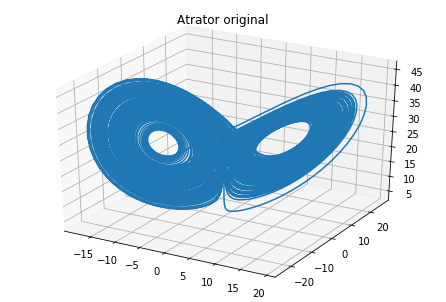

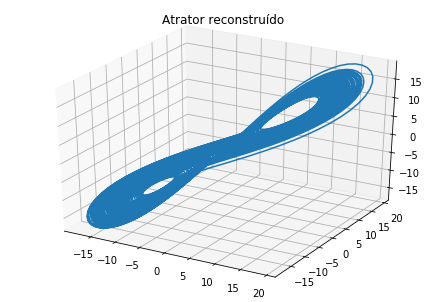

In [60]:
ex_2()

In [35]:
atrator_3d = lorenz_generate(2**14)
atrator_d0=atrator_3d[0]
calc_attractor_dimension(atrator_d0)

r 1.4457369674451328
m_list [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
v_list [10.503152924916984, 9.56817732554579, 9.041845387912842, 9.041845387912842, 9.041845387912842, 9.041845387912842, 9.041845387912842, 8.62401984651128, 7.844424641764459, 7.5253177811515615, 7.5253177811515615, 7.5253177811515615, 7.5253177811515615, 7.5253177811515615, 7.5253177811515615, 6.25253602380364, 6.25253602380364, 6.25253602380364, 6.25253602380364, 6.25253602380364]
k 0.9349755993711941
limiar 0.0956817732554579
k 1.4613075370041422
limiar 0.09041845387912842
k 0.526331937632948
limiar 0.09041845387912842
k 0.0
limiar 0.09041845387912842


3

In [36]:
import pandas as pd

In [37]:
gold = pd.read_csv("golden_usd.csv")

In [113]:
create_lagged_series(gold.price.values,1,1)

[array([  34.73 ,   34.73 ,   34.73 ,   34.73 ,   34.73 ,   34.73 ,
          34.73 ,   34.73 ,   34.73 ,   34.73 ,   34.73 ,   34.72 ,
          34.72 ,   34.73 ,   34.73 ,   34.73 ,   34.73 ,   34.73 ,
          34.72 ,   34.71 ,   34.71 ,   34.71 ,   34.73 ,   34.66 ,
          34.49 ,   34.49 ,   34.68 ,   34.82 ,   34.73 ,   34.53 ,
          34.57 ,   34.58 ,   34.51 ,   34.63 ,   34.72 ,   34.79 ,
          34.88 ,   34.95 ,   34.92 ,   34.93 ,   34.9  ,   34.89 ,
          34.91 ,   34.91 ,   34.76 ,   34.79 ,   34.86 ,   34.85 ,
          34.86 ,   34.88 ,   34.92 ,   35.04 ,   35.08 ,   35.07 ,
          35.08 ,   35.05 ,   35.08 ,   35.08 ,   35.06 ,   35.04 ,
          35.04 ,   35.05 ,   35.06 ,   35.05 ,   35.05 ,   35.04 ,
          35.05 ,   35.03 ,   34.98 ,   34.98 ,   34.98 ,   34.97 ,
          34.99 ,   34.99 ,   34.99 ,   34.98 ,   34.99 ,   34.98 ,
          35.   ,   35.02 ,   35.01 ,   35.02 ,   34.98 ,   34.9  ,
          34.88 ,   34.89 ,   34.91 ,   34.92 , 

In [38]:
calc_attractor_dimension(gold.price,dim_min=1,dim_max=20)

r 7.105427357601002e-15
m_list [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
v_list [-0.14136546283097612, -0.14136546283097612, -0.1352753814024667, -0.1286144636916115, -0.12129906644217742, -0.11324956105482131, -0.10442465665948958, -0.09491251384801731, -0.08514898623215209, -0.07633258909568384, -0.07074745801969588, -0.07074745801969588, -0.07074745801969588, -0.07074745801969588, -0.07074745801969588, -0.07074745801969588, -0.07074745801969588, -0.07074745801969588, -0.07074745801969588, -0.07074745801969588]
k 0.0
limiar -0.0014136546283097613


1

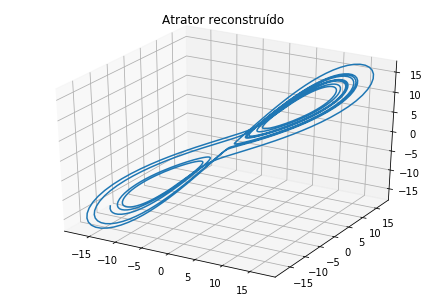

In [124]:
#atrator_d0=gold.price
atrator_d0=lorenz_generate(1000)[0]


#por que esse valor? Aqui foi arbitrário. Existem métodos para isso, não explorados aqui 
tau=3;

#a partir de 1 dimensão do atrator, criamos 3 séries com atraso 0,tau, 2*tau
# data_lag0 = atrator_d0

# data_lag1 = numpy.roll(data_lag0, -tau)[:-tau]

# data_lag2 = numpy.roll(data_lag1, -tau)[:-tau]

# #imprime o atrator, pronto. Reconstruído
# plot3d([data_lag0[:-2*tau], data_lag1[:-tau], data_lag2],"Atrator reconstruído")
lagged_series=create_lagged_series(atrator_d0,3,3)
plot3d(lagged_series,"Atrator reconstruído")

In [118]:
lagged_series

[array([  34.73 ,   34.73 ,   34.73 ,   34.73 ,   34.73 ,   34.73 ,
          34.73 ,   34.73 ,   34.73 ,   34.73 ,   34.73 ,   34.72 ,
          34.72 ,   34.73 ,   34.73 ,   34.73 ,   34.73 ,   34.73 ,
          34.72 ,   34.71 ,   34.71 ,   34.71 ,   34.73 ,   34.66 ,
          34.49 ,   34.49 ,   34.68 ,   34.82 ,   34.73 ,   34.53 ,
          34.57 ,   34.58 ,   34.51 ,   34.63 ,   34.72 ,   34.79 ,
          34.88 ,   34.95 ,   34.92 ,   34.93 ,   34.9  ,   34.89 ,
          34.91 ,   34.91 ,   34.76 ,   34.79 ,   34.86 ,   34.85 ,
          34.86 ,   34.88 ,   34.92 ,   35.04 ,   35.08 ,   35.07 ,
          35.08 ,   35.05 ,   35.08 ,   35.08 ,   35.06 ,   35.04 ,
          35.04 ,   35.05 ,   35.06 ,   35.05 ,   35.05 ,   35.04 ,
          35.05 ,   35.03 ,   34.98 ,   34.98 ,   34.98 ,   34.97 ,
          34.99 ,   34.99 ,   34.99 ,   34.98 ,   34.99 ,   34.98 ,
          35.   ,   35.02 ,   35.01 ,   35.02 ,   34.98 ,   34.9  ,
          34.88 ,   34.89 ,   34.91 ,   34.92 , 

In [109]:
def lyap_from_serie(serie):

    lagged_series=create_lagged_series(serie,2,2)
    y=lagged_series[0]
    z=lagged_series[1]
    size=len(lagged_series[1])
    s=0
    k=10
    j=0
    while j<(size-k):
        L=abs(y[j]-z[j])
        L_linha=abs(y[j]-z[j+k])
        s+=math.log((L_linha+1e-6)/float(L+1e-6), 2)
        j+=k

    lyap=s/float(size)

    return  lyap

In [111]:
lyap_from_serie(np.random.rand(100))

0.027543597486999537

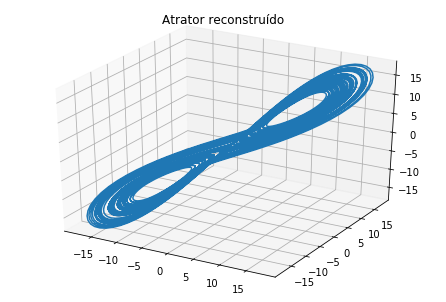

In [26]:
atrator_d0=lorenz_generate(2**13)[0,:]


#por que esse valor? Aqui foi arbitrário. Existem métodos para isso, não explorados aqui 
tau=3;

#a partir de 1 dimensão do atrator, criamos 3 séries com atraso 0,tau, 2*tau
# data_lag0 = atrator_d0

# data_lag1 = numpy.roll(data_lag0, -tau)[:-tau]

# data_lag2 = numpy.roll(data_lag1, -tau)[:-tau]

# #imprime o atrator, pronto. Reconstruído
# plot3d([data_lag0[:-2*tau], data_lag1[:-tau], data_lag2],"Atrator reconstruído")
lagged_series=create_lagged_series(atrator_d0,9,tau)
plot3d(lagged_series,"Atrator reconstruído")

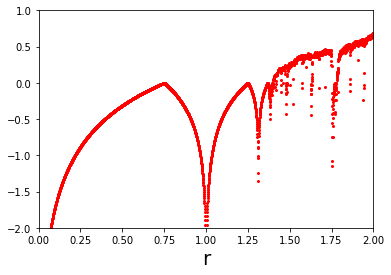

In [164]:

# plot periodic orbits and iterations for a map  
# or plot the lyapunov exponent for the map
# 
import numpy as np
import matplotlib.pyplot as plt

# Here is our map f(x) 
def ourmap(x,r):
    y = r - x*x
    return y 

# derivative of f(x) or f'(x)
def deriv_ourmap(x,r):
    dd = -2.0*x
    return dd

# fill an array with iteration n1 to n2 of the map starting with x0
# and with parameter r
def fillit(n1,n2,x0,r):
    x = x0  # initial x value
    z = np.linspace(0.0,1.0,n2-n1)  # create an array
    for i in range(0,n1):   # do n1 iterations
        x = ourmap(x,r)

    for i in range(0,n2-n1):   # fill n2-n1 iterations
        x = ourmap(x,r)
        z[i] = x

    return z  # returning the array

# compute lyapunov exponent by averaging log of derivatives
# with parameter r, initial condition x0, using iterations n1-n2
def lyapunov(n1,n2,x0,r):
    x = x0  # initial x value
    for i in range(0,n1):   # do n1 iterations
        x = ourmap(x,r)

    sum = 0.0
    for i in range(0,n2-n1):   # for n2-n1 iterations sum derivatives
        dd = deriv_ourmap(x,r)
        sum += np.log(np.abs(deriv_ourmap(x,r)) + 1e-10)
        x = ourmap(x,r)

    return sum/(n2-n1)  # returning average of derivatives


# plot the iterated map (periodic attractors) for nr number of r values
# here x0 is initial x
# do the computation for r in r_min to r_max
def mkplot(r_min,r_max,x0,nr): 
    rarr = np.linspace(r_min,r_max,nr)  
    n1=100  #specify iteration range
    n2=200  
    for i in range(0,nr):  
        r = rarr[i]
        y=fillit(n1,n2,x0,r)  # get the array of iterations
        x=y*0.0 + r   # dummy x value is all r 
        plt.plot(x,y,'ko',markersize=1)   # k=black, plot small points

# compute the lyapunov exponent between r_min and r_max
# for nr of r values
# and using initial condition x0
def lyapunovrange(r_min,r_max,x0,nr):
    rarr = np.linspace(r_min,r_max,nr)  
    n1=400  #specify iteration range
    n2=800  
    LL=rarr*0.0   # set up an array 
    for i in range(0,nr):  
        r = rarr[i]
        LL[i] = lyapunov(n1,n2,x0,r)

    plt.plot(rarr,LL,'ro',markersize=2)   # r=red, plot small points

# set up the plot
plt.figure()
plt.xlabel(r'r',fontsize=20)
r_min=0.0  # range
r_max=2.0
x0=0.1    #initial condition
# this makes a plot of attracting points
#plt.axis([r_min, r_max,-2, 2.0])
#mkplot(r_min,r_max,x0,1000)

# plots the lyapunov exponent
plt.axis([r_min, r_max,-2, 1.0])
lyapunovrange(r_min,r_max,x0,3000) 